<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import mpld3

In [ ]:
def diff(k, n_1, n_2):
    ex_1 = k*(1- (k+1)/(2*(n_1+1)))
    ex_2 = k*(1- (k+1)/(2*(n_2+1)))
    return ex_1 - ex_2

def pct_of_k(diff_output, k):
    return diff_output/k*100



<IPython.core.display.Javascript object>


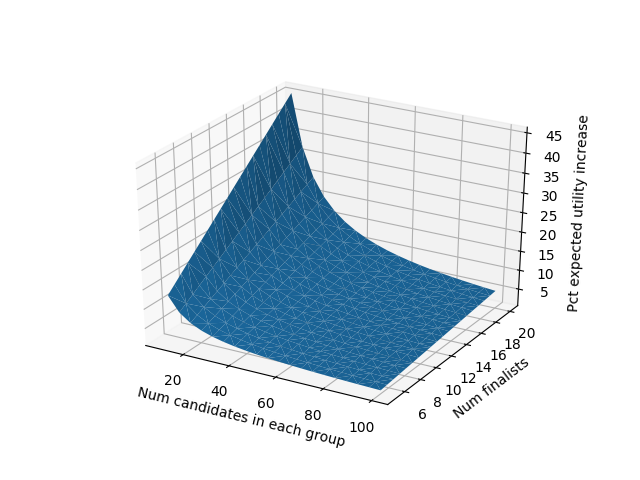

k: 5.0 n: 10.0
k: 5.7894736842105265 n: 10.0
k: 6.578947368421053 n: 10.0
k: 7.368421052631579 n: 10.0
k: 7.368421052631579 n: 14.736842105263158
k: 8.157894736842106 n: 10.0
k: 8.157894736842106 n: 14.736842105263158
k: 8.947368421052632 n: 10.0
k: 8.947368421052632 n: 14.736842105263158
k: 9.736842105263158 n: 10.0
k: 9.736842105263158 n: 14.736842105263158
k: 9.736842105263158 n: 19.473684210526315
k: 10.526315789473685 n: 14.736842105263158
k: 10.526315789473685 n: 19.473684210526315
k: 11.31578947368421 n: 14.736842105263158
k: 11.31578947368421 n: 19.473684210526315
k: 12.105263157894736 n: 14.736842105263158
k: 12.105263157894736 n: 19.473684210526315
k: 12.105263157894736 n: 24.210526315789473
k: 12.894736842105264 n: 14.736842105263158
k: 12.894736842105264 n: 19.473684210526315
k: 12.894736842105264 n: 24.210526315789473
k: 13.68421052631579 n: 14.736842105263158
k: 13.68421052631579 n: 19.473684210526315
k: 13.68421052631579 n: 24.210526315789473
k: 13.68421052631579 n: 28.9

In [52]:
%matplotlib notebook

n_n = 20
n_k = 20

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
n = np.linspace(10, 100, n_n)
k = np.linspace(5, 20, n_k)

# Repeat all angles for each radius.
k = np.repeat(k[..., np.newaxis], n_n, axis=1)
n = np.array(list(n for _ in range(n_k)))

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = n.flatten()
y = k.flatten()

# Compute z to make the pringle surface.
z = (y * ( 1 - (y+1)/(2*(2*x+1))) - y * ( 1 - (y+1)/(2*(x+1))))/y*100
# z = [max(i, 25) for i in z]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
plt.xlabel('Num candidates in each group')
plt.ylabel('Num finalists')
ax.set_zlabel('Pct expected utility increase')

plt.show()

for i, el in enumerate(z):
    if (el > 12 and y[i] < x[i]):
        print(f'k: {y[i]}', f'n: {x[i]}')